# Data Preparation

Let's prepare a collection images for processing by a convolutional network.

#### 1. Download and unzip the CIFAR10 dataset **hosted by kaggle**. CIFAR10 is a very popular dataset with 60,000 32x32 colour images distributed evenly across 10 classes. The dataset is included in the TensorFlow library, but we will download and prepare it.
    - [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/cifar-10-python.tar.gz .

In [ ]:
import tarfile

with tarfile.open('cifar-10-python.tar.gz', 'r:gz') as tar_ref:
    tar_ref.extractall()

#### 2. Run the following code. This code converts the downloaded data into image files that will be stored in two folders:
    - `cifar_images_train`
    - `cifar_images_test`

In [ ]:
import numpy as np
import os
import pickle
from matplotlib import pyplot as plt

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def save_images_from_dict(dict, folder):
    for i in range(len(dict[b'data'])):
        flat_image = dict[b'data'][i]
        image = np.transpose(np.reshape(flat_image,(3, 32,32)), (1,2,0))
        label = dict[b'labels'][i]
        filename = f"{folder}/{label}_{i}.png"
        plt.imsave(filename,image)

data_folder = "cifar-10-batches-py"
output_folder = "cifar_images"

if not os.path.exists(output_folder+"_train"):
    os.makedirs(output_folder+"_train")
if not os.path.exists(output_folder+"_test"):
    os.makedirs(output_folder+"_test")

for batch in range(1,6):
    batch_file = f"{data_folder}/data_batch_{batch}"
    batch_dict = unpickle(batch_file)
    save_images_from_dict(batch_dict,output_folder+"_train")

test_file = f"{data_folder}/test_batch"
test_dict = unpickle(test_file)
save_images_from_dict(test_dict,output_folder+"_test")

#### 3. Inspect the resulting image files. You will see that the filenames are of the form `label_imagenumber.png`. For your reference, the following code is a list with the label names, so that label 0 is "airplane", label 1 is "automobile", etc.

In [ ]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#### 4. Check whether the data are balanced. To do this, first write a function `call_counts` that takes as input the path of the folder that contains the training (or the test) data, and returns a dictionary where the keys are the label names, and the values are the image counts for each label.

In [ ]:
import os
import collections

def call_counts(path):
    labels = [label_names[int(file[0])] for file in os.listdir(path) if not file.startswith('.')]
    counts = collections.Counter(labels)
    return dict(counts)


In [ ]:
call_counts('cifar_images_test')

{'automobile': 1000,
 'dog': 1000,
 'bird': 1000,
 'deer': 1000,
 'truck': 1000,
 'horse': 1000,
 'airplane': 1000,
 'ship': 1000,
 'cat': 1000,
 'frog': 1000}

In [ ]:
call_counts('cifar_images_train')

{'frog': 4134,
 'airplane': 4100,
 'cat': 4083,
 'dog': 4104,
 'deer': 4140,
 'truck': 4097,
 'horse': 4134,
 'ship': 4124,
 'automobile': 4107,
 'bird': 4106}

#### 5. Write a Python function `sample_images` that takes as input the following information:
     - `path`: the path of the folder that contains images
     - `label_name`: a label name (e.g. "deer", "horse", etc)
   The function must return a list of tuples (filename, label_name) that contains all file names in the path that belong to class, together with the label.


In [ ]:
def sample_images(path, label_name):
    return [(path+"/"+fname, label_name) for fname in os.listdir(path) if label_names[int(fname[0])] == label_name]

In [ ]:
sample_images("cifar_images_test", "horse")

[('cifar_images_test/7_7271.png', 'horse'),
 ('cifar_images_test/7_6954.png', 'horse'),
 ('cifar_images_test/7_7587.png', 'horse'),
 ('cifar_images_test/7_2131.png', 'horse'),
 ('cifar_images_test/7_1157.png', 'horse'),
 ('cifar_images_test/7_8767.png', 'horse'),
 ('cifar_images_test/7_571.png', 'horse'),
 ('cifar_images_test/7_5168.png', 'horse'),
 ('cifar_images_test/7_5049.png', 'horse'),
 ('cifar_images_test/7_9953.png', 'horse'),
 ('cifar_images_test/7_7882.png', 'horse'),
 ('cifar_images_test/7_6496.png', 'horse'),
 ('cifar_images_test/7_1679.png', 'horse'),
 ('cifar_images_test/7_8221.png', 'horse'),
 ('cifar_images_test/7_3093.png', 'horse'),
 ('cifar_images_test/7_1119.png', 'horse'),
 ('cifar_images_test/7_5706.png', 'horse'),
 ('cifar_images_test/7_9999.png', 'horse'),
 ('cifar_images_test/7_4905.png', 'horse'),
 ('cifar_images_test/7_6420.png', 'horse'),
 ('cifar_images_test/7_9682.png', 'horse'),
 ('cifar_images_test/7_4382.png', 'horse'),
 ('cifar_images_test/7_1169.png',

#### 6. Here, we provided you with the function `sample_image_folder` as below.

In [ ]:
def sample_image_folder(path, selected_label_names, sample_numbers, output_filenames):
    result = []
    start = 0
    for i, n in enumerate(sample_numbers):
        selected_image_files = []
        for l in selected_label_names:
            image_files = sample_images(path, l)
            selected_image_files += image_files[start:start+n]

        start = start+n
        filename = output_filenames[i]
        lines = ["%s,%s\n" % fname for fname in selected_image_files]
        with open(filename, "w") as f:
            f.writelines(lines)
        result.append(filename)
    return result

#### Generate three CSV files as follows:
   - One CSV file "train_set.csv" that contains the first 2000 samples of categories "bird", "cat", "deer", "horse" from the **training** set.
   - One CSV file "devtest_set.csv" that contains the subsequent 500 samples of the same categories from the **training** set.
   - One CSV file "test_set.csv" that contains the first 500 samples of the same categories from the **test** set.
   
   You will use these CSV files in your subsequent work.

   The function `sample_image_folder` takes these parameters:
    - `path`: the path of the folder containing the images.
    - `selected_label_names`: a list of label names.
    - `sample_numbers`: a list of integers.
    - `output_filenames`: a list of filenames where the CSV files will be stored.
  

In [ ]:
sample_image_folder('cifar_images_train', ('bird', 'cat', 'deer', 'horse'), (2000, 500), ('train_set.csv', 'devtest_set.csv'))

['train_set.csv', 'devtest_set.csv']

In [ ]:
sample_image_folder('cifar_images_test', ('bird', 'cat', 'deer', 'horse'), (500,), ('test_set.csv',))

['test_set.csv']

# 3. Implement Transfer Learning

Re-use and adapt the code from notebook `Week 4 Flowers_transferlearning.ipynb` so that it uses Mobilenet_v02 pre-trained with imagenet. Train the model with your training data, and evaluate it with your test data. Comment on your results. Answer the following questions.

1. What is the accuracy of the training data and the test data?
2. What is the optimal choice of number of epochs, based on your experiments?

In [ ]:
import tensorflow as tf
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
from tensorflow import keras
keras.__version__

'2.12.0'

In [ ]:
pip install --upgrade tensorflow-hub

In [ ]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3

CLASS_NAMES = ['bird', 'cat', 'deer', 'horse']

In [ ]:
def read_and_decode(filename, reshape_dims):
    # Read the file
    img = tf.io.read_file(filename)
    # Convert the compressed string to a 3D uint8 tensor.
    img = tf.image.decode_jpeg(img, channels=3)
    # Use `convert_image_dtype` to convert to floats in the [0,1] range.
    img = tf.image.convert_image_dtype(img, tf.float32)
    # Resize the image to the desired size.
    return tf.image.resize(img, reshape_dims)

# decode_csv changed so that the label is the index into CLASS_NAMES array
def decode_csv(csv_row):
    record_defaults = ["path", "label"]
    filename, label_string = tf.io.decode_csv(csv_row, record_defaults)
    img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
    label = tf.argmax(tf.math.equal(CLASS_NAMES, label_string))
    return img, label


In [ ]:
import matplotlib.pylab as plt

# Helper functions
def training_plot(metrics, history):
  f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
  for idx, metric in enumerate(metrics):
    ax[idx].plot(history.history[metric], ls='dashed')
    ax[idx].set_xlabel("Epochs")
    ax[idx].set_ylabel(metric)
    ax[idx].plot(history.history['val_' + metric]);
    ax[idx].legend([metric, 'val_' + metric])

# Call model.predict() on a few images in the evaluation dataset
def plot_predictions(model, filename):
  f, ax = plt.subplots(3, 5, figsize=(25,15))
  dataset = (tf.data.TextLineDataset(filename).
      map(decode_csv))
  for idx, (img, label) in enumerate(dataset.take(15)):
    ax[idx//5, idx%5].imshow((img.numpy()));
    batch_image = tf.reshape(img, [1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS])
    batch_pred = model.predict(batch_image)
    pred = batch_pred[0]
    label = CLASS_NAMES[label.numpy()]
    pred_label_index = tf.math.argmax(pred).numpy()
    pred_label = CLASS_NAMES[pred_label_index]
    prob = pred[pred_label_index]
    ax[idx//5, idx%5].set_title('{}: {} ({:.4f})'.format(label, pred_label, prob))
    ax[idx//5, idx%5].axis('off')

In [ ]:
import tensorflow_hub as hub
import os
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

# parameterize to the values in the previous cell
def train_and_evaluate(batch_size = 32,
                       lrate = 0.001,
                       num_hidden = 16,
                       epochs = 10):

  train_dataset = (tf.data.TextLineDataset(
        "train_set.csv").
        map(decode_csv)).batch(batch_size)

  eval_dataset = (tf.data.TextLineDataset(
        "devtest_set.csv").
        map(decode_csv)).batch(batch_size)

  model = tf.keras.Sequential(name='CIFAR10_classification')

  model.add(hub.KerasLayer(
          "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
          input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
          trainable=False,
          name='mobilenet_embedding'))

  model.add(tf.keras.layers.Dense(num_hidden,
                            activation='relu',
                            name='dense_hidden'))
  model.add(tf.keras.layers.Dense(len(CLASS_NAMES),
                            activation='softmax',
                            name='CIFAR10_prob'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(
                    from_logits=False),
                metrics=['accuracy'])
  print(model.summary())
  history = model.fit(train_dataset, validation_data=eval_dataset, epochs=epochs,
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2)])
  training_plot(['loss', 'accuracy'], history)
  return model

Model: "CIFAR10_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_embedding (KerasL  (None, 1280)             2257984   
 ayer)                                                           
                                                                 
 dense_hidden (Dense)        (None, 16)                20496     
                                                                 
 CIFAR10_prob (Dense)        (None, 4)                 68        
                                                                 
Total params: 2,278,548
Trainable params: 20,564
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/10
250/250 [==============================] - 16s 47ms/step - loss: 1.8742 - accuracy: 0.6541 - val_loss: 1.3902 - val_accuracy: 0.2500
Epoch 2/10
250/250 [==============================] - 11s 45ms/step - loss: 1.

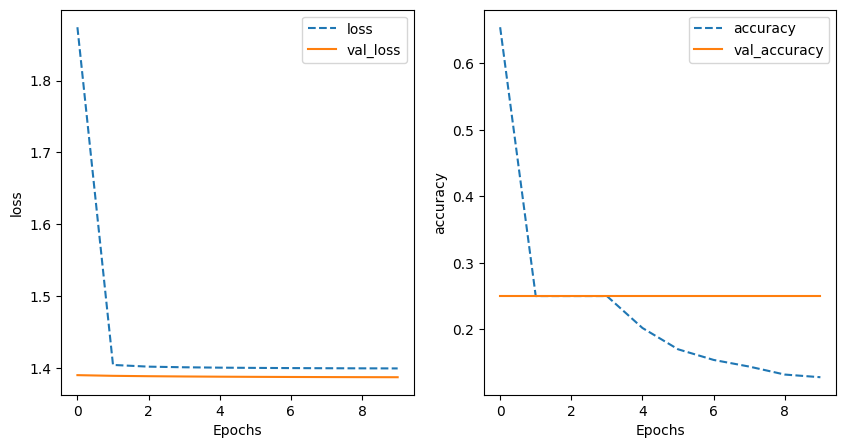

In [ ]:
model = train_and_evaluate()